In [1]:
%matplotlib inline
import torch
from IPython import display  
from matplotlib import pylab as plt
import numpy as np
import random

In [2]:
num_inputs=2
num_sample=100
W=[3,-2.2]
B=3
Xinput=torch.randn(num_sample,num_inputs,dtype=torch.float32)#随机生成样本数据
labels=W[0]*Xinput[:,0]+W[1]*Xinput[:,1]+B
print(Xinput[0],labels[0])

tensor([ 1.0852, -1.0311]) tensor(8.5240)


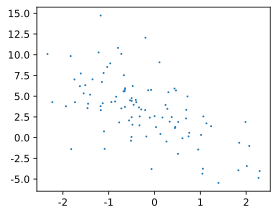

torch.Size([100, 2]) torch.Size([100])


In [3]:
def use_svg_display():
    display.set_matplotlib_formats('svg') #设置绘图为矢量图

def set_fig_size(figsize=(4.2,3.4)):
    use_svg_display()
    plt.rcParams['figure.figsize']=figsize# 设置绘图的尺寸

#plt.rcParams['font.sans-serif']=['SimHei']# kentchen font.san-serif
plt.rcParams['axes.unicode_minus']=False
set_fig_size()
plt.scatter(Xinput[:,1].numpy(),labels.numpy(),1)
plt.show()
print(Xinput.shape,labels.shape)

In [4]:
batch_size=2
def data_iter(batch_size, Xinput, labels):
    num_Xinput = len(Xinput)
    indices = list(range(num_Xinput))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_Xinput, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_Xinput)]) # 最后一次可能不足一个batch
        yield  Xinput.index_select(0, j), labels.index_select(0, j)

In [5]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32).requires_grad_(requires_grad=True)
b = torch.zeros(1, dtype=torch.float32).requires_grad_(requires_grad=True)

def linreg(X, w, b): 
    return torch.mm(X, w) + b

In [6]:
def squared_loss(y_hat, y):
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [7]:
def sgd(params, lr, batch_size):
    for param in params:
           param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [8]:
lr = 0.03
epochs = 3
net = linreg
loss = squared_loss
for epoch in range(epochs):  # 训练模型一共需要epochs个迭代周期
    # 每一个迭代周期，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。
    # X和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, Xinput, labels):
        Model = net(X, w, b)
        l = loss(Model, y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降法迭代模型参数

        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(Xinput, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))


epoch 1, loss 0.403237
epoch 2, loss 0.017654
epoch 3, loss 0.001043


In [9]:
print(W, '\n', w)
print(B, '\n', b)

[3, -2.2] 
 tensor([[ 2.9684],
        [-2.2139]], requires_grad=True)
3 
 tensor([2.9650], requires_grad=True)
